<a href="https://colab.research.google.com/github/sejallotliker/MLnow_2.0/blob/main/ML_EDA_Students_performance_in_exam_univariate_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine learning

Exploratory data analysis

Author: `Sejal Lotliker`

Date: `07-06-21`

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os

In [12]:
path='/content/drive/MyDrive/Machine learning course by Girlscript/ML_EDA_Students performance in exam/StudentsPerformance.csv'
my_data=my_data=pd.read_csv(path)

In [13]:
my_data.head(10)

,gender,groups,parentsEducation,lunch,test_preparation_course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [14]:
ls

drive/  sample_data/


#**Data** **Processing**

In [16]:
print(f'gender:{my_data.gender.unique()}')
print(f'groups:{my_data.groups.unique()}')
print(f'parentsEducation:{my_data.parentsEducation.unique()}')
print(f'lunch:{my_data.lunch.unique()}')
print(f'test_preparation_course:{my_data.test_preparation_course.unique()}')

gender:['female' 'male']
groups:['group B' 'group C' 'group A' 'group D' 'group E']
parentsEducation:["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch:['standard' 'free/reduced']
test_preparation_course:['none' 'completed']


#Converting categorical data to numeric

Replacing female=1, male=2

In [17]:
my_data['gender']=my_data['gender'].apply({'female':1, 'male':2}.get)
my_data['groups']=my_data['groups'].apply({'group B':1, 'group C':2, 'group A':3, 'group D':4, 'group E':5}.get)
my_data['parentsEducation']=my_data['parentsEducation'].apply({"bachelor's degree":1, 'some college':2, "master's degree":3 ,"associate's degree":4,
 'high school':5, 'some high school':6}.get)
my_data['lunch']=my_data['lunch'].apply({'standard':1, 'free/reduced':2}.get)
my_data['test_preparation_course']=my_data['test_preparation_course'].apply({'none':0, 'completed':1}.get)


In [19]:
my_data.head()

,gender,groups,parentsEducation,lunch,test_preparation_course,math score,reading score,writing score
0,1,1,1,1,0,72,72,74
1,1,2,2,1,1,69,90,88
2,1,1,3,1,0,90,95,93
3,2,3,4,2,0,47,57,44
4,2,2,2,1,0,76,78,75


#Data visualisation

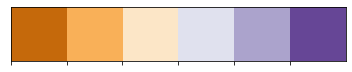

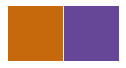

In [20]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purpole to orange colors
pal=sns.color_palette('PuOr',6) #To print 6 shades from purple to orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors=['#c6690c','#664697'] #orange purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [21]:
print(f'''There are {len(my_data.columns)} columns in the data frame namely,
{my_data.columns}''')

There are 8 columns in the data frame namely,
Index(['gender', 'groups', 'parentsEducation', 'lunch',
       'test_preparation_course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


Pairplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

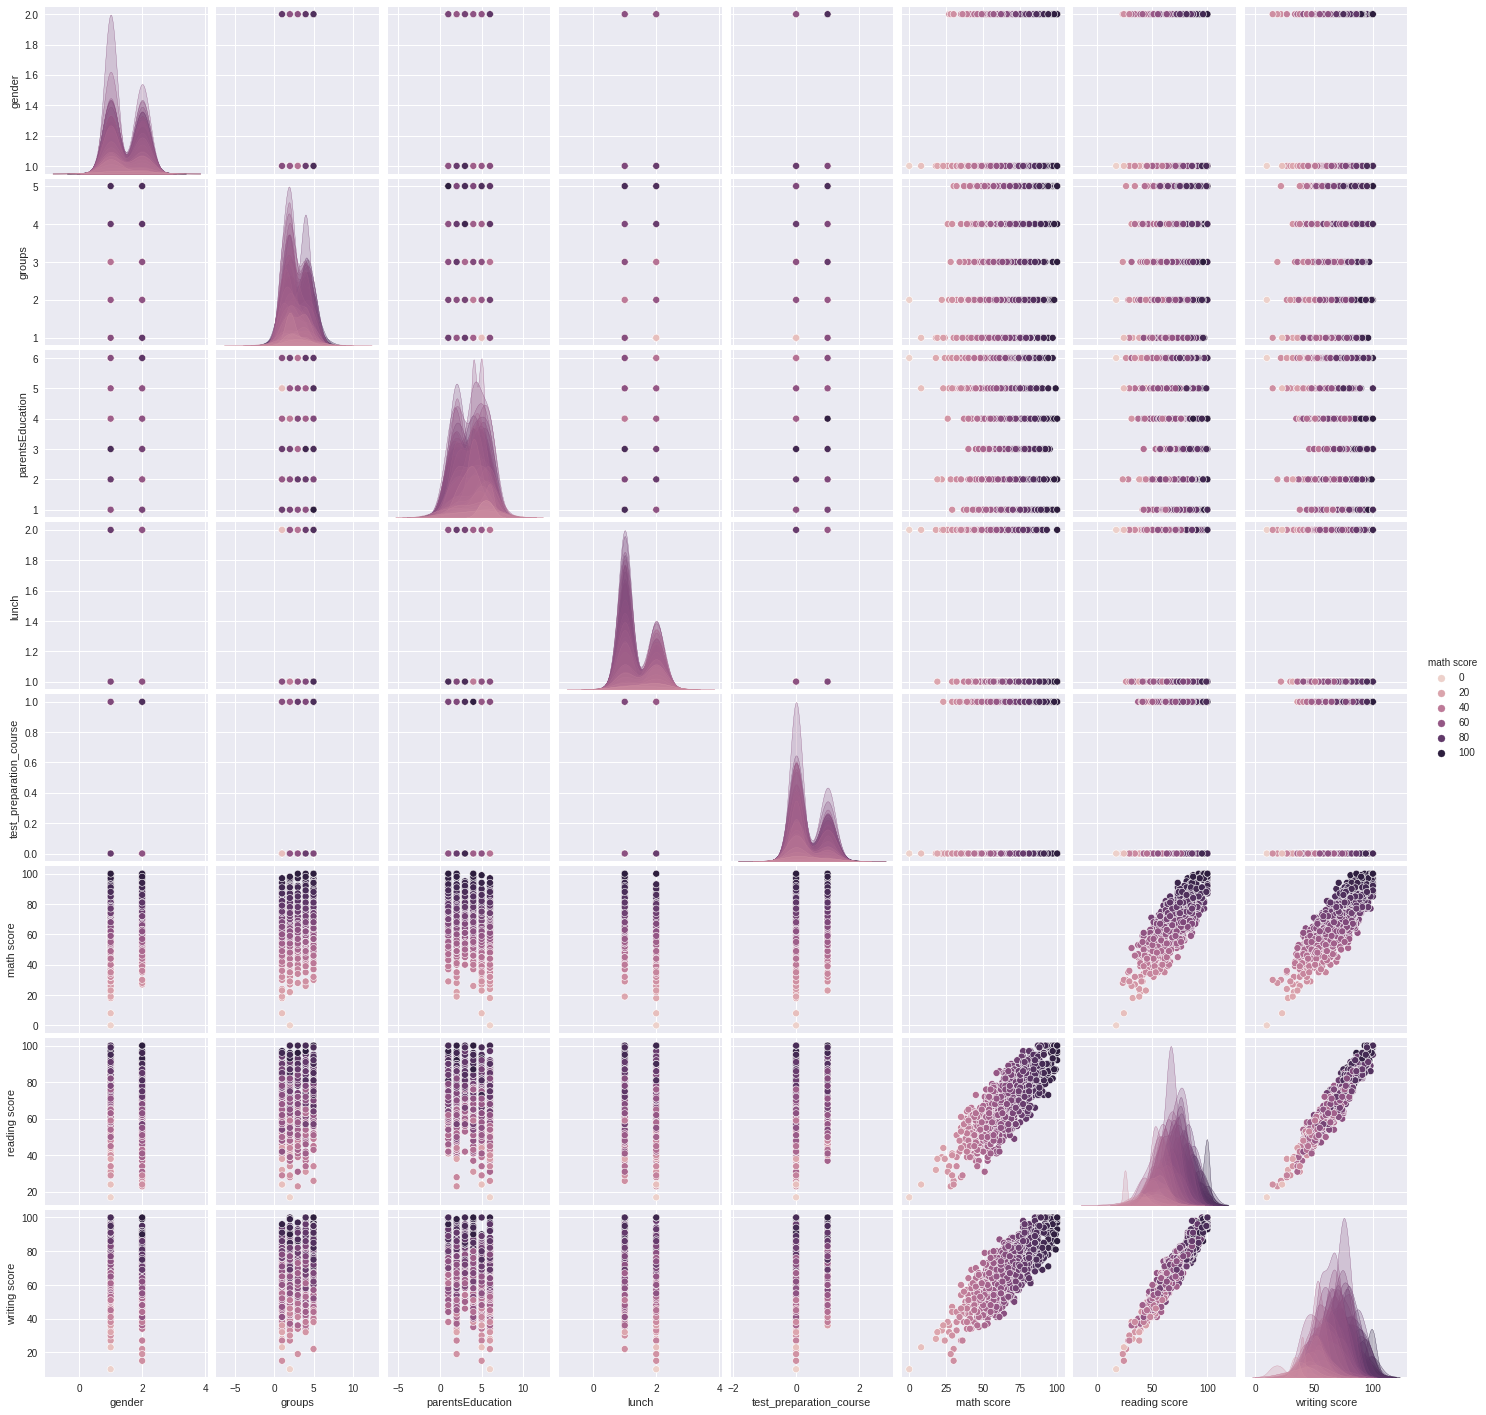

In [23]:
sns.pairplot(my_data,
             x_vars = ['gender', 'groups', 'parentsEducation', 'lunch',
       'test_preparation_course', 'math score', 'reading score',
       'writing score'],
             y_vars = ['gender', 'groups', 'parentsEducation', 'lunch',
       'test_preparation_course', 'math score', 'reading score',
       'writing score'],
             diag_kind='kde', hue='math score'
             )

Strip plot

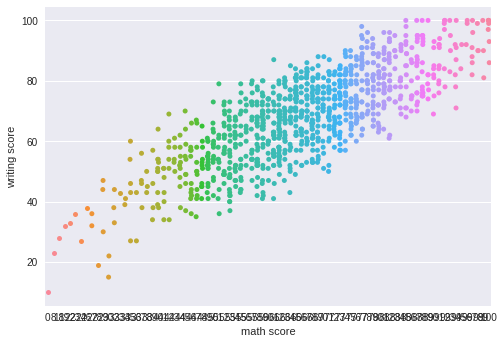

In [24]:
sns.stripplot(y='writing score', x='math score', data= my_data)